## Solutions of the time-dependent Schrodinger Equation by solving ODE Problem

In [4]:
using LinearAlgebra, Plots, SparseArrays
using PolynomialRoots

### Initial conditions

In [113]:
L = 100                 
n = 500                           # number of point in space 
a = -L/2                          # Initial point
b = L/2                           # End point

dx    = (b-a)/n                   # spatial separation
x     = a:dx:b                    # spatial grid points
k_x    = 5.0                      # wave number
m     = 1                         # mass
sigma = 2                         # width of initial gaussian wave fucntion
x0    = -20                       # center of initial gaussian wave function

hbar = 1

dt = 1                          # time step
t_vals = (0,100)                 # Time grid points

println("n=",n, " length(x)=",length(x), " dx = ",dx, " dt = ",dt)


n=500 length(x)=501 dx = 0.2 dt = 1


### Infinite potential well

In [114]:
function potential_well(x)
    if abs(x) < 50
        return 0
    else
        return 1E3
    end
end

potential_vals = @. potential_well(x)

501-element Vector{Real}:
 1000.0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    ⋮
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
 1000.0

### Initial wave function and Normalization

Normalization using simpsons rule = 3.5449077018110313
Normalization using quadGK = (3.5449077018110318, 1.6451396297288638e-9)
rel_error = abs(integral - value) * 100 = 4.440892098500626e-14
Total Probability:0.9999999999999999


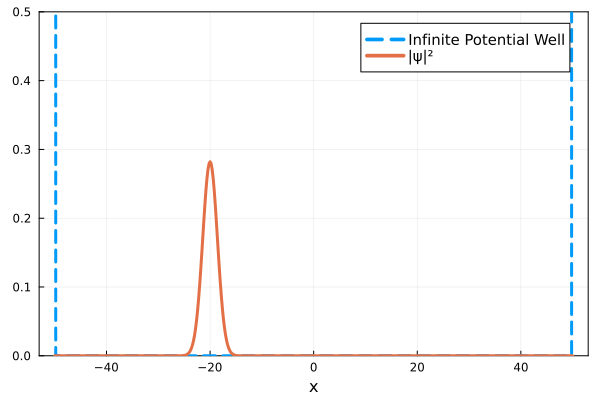

In [115]:
using QuadGK
using Plots
include("/Users/kedarmal/Desktop/Project1/Group10/simpsons.jl")

# Initial wave function
f(x) = exp(-(x-x0)^2/(2*sigma^2))*exp(im*(k_x*x))


value = simpsons(x -> abs(f(x)*conj(f(x))),a,b,n)
println("Normalization using simpsons rule = ",value)

integral, err = quadgk(x -> abs2(f(x)), a, b, rtol=1e-9)
println("Normalization using quadGK = ",(integral,err))
@show rel_error = abs(integral-value)*100

A = 1.0/sqrt(value)                                        # Normalization constant

# Normalized wave function
f(x) = A*exp(-(x-x0)^2/(2*sigma^2))*exp(im*(k_x*x))
println("Total Probability:", simpsons(x -> abs(f(x)*conj(f(x))),a,b,n))


psi0 = @. A*exp(-(x-x0)^2/(2*sigma^2))*exp(im*(k_x*x))     # wave function at time t = 0

# Make a plot of psi0 and V 
plot(x, potential_vals;lw = 3,ls=:dash,label = "Infinite Potential Well",xlabel = "x",legend=:topright, legendfontsize=10,framestyle = :box)
plot!(x, @.abs(psi0)^2;lw=3,label = "|ψ|²")
ylims!(0,0.5)


## Laplace Operator (Finite Difference)

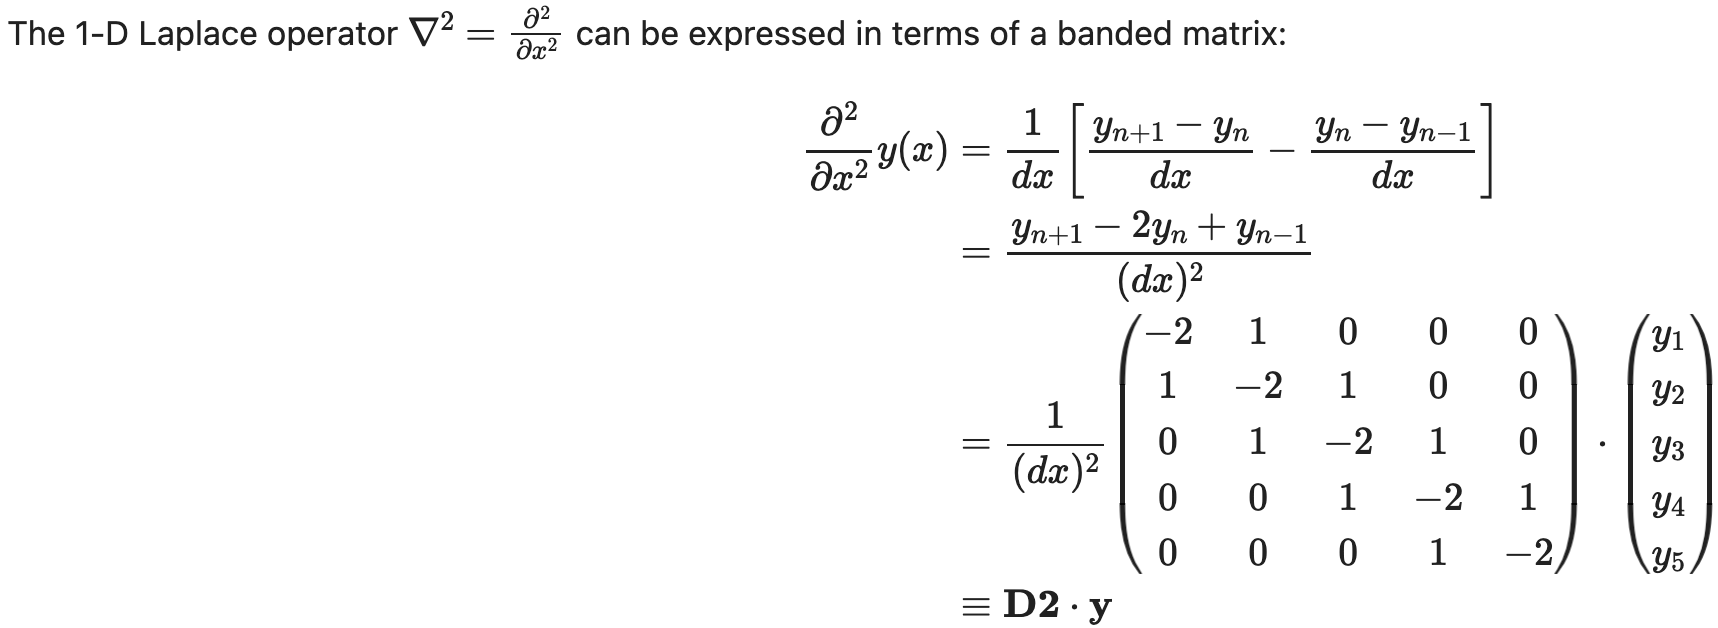

1×3 Matrix{Rational}:
 1//1  -2//1  1//1

Sparse Matrix for D2 operator

501×501 SparseMatrixCSC{Float64, Int64} with 1501 stored entries:
⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦

Sparse Matrix for Potential operator

501×501 SparseMatrixCSC{Float64, Int64} with 2 stored entries:
⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀

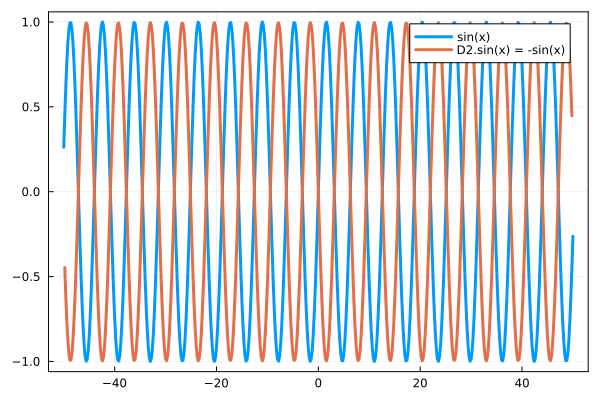

In [116]:
using SparseArrays
using LinearAlgebra
include("/Users/kedarmal/Desktop/Project1/Group10/coeff_2kth_derivative1(r, x0).jl")
    
    r = 1
    C = coeff_2kth_derivative1(r,0)
    display(C)

    N = n+1

    # Defining a sparse matrix for D2 operator
    D2 = spzeros(Rational,N, N)               
    D2 = spdiagm(-1 => ones(N-1)*C[1,1],0 => ones(N)*C[1,2],1 => ones(N-1)*C[1,3])/dx^2
    print("Sparse Matrix for D2 operator")
    display(D2)
    
    # Defining a sparse matrix for Potential operator
    Vol = spzeros(N, N)
        for i in 1:length(x)
            Vol[i,i] = potential_vals[i,1]
        end
    print("Sparse Matrix for Potential operator")
    display(Vol)

    # Testing D2 operator on function sin(x)
    plot(x,sin.(x),w = 3,label="sin(x)",framestyle = :box)
    y2 = D2*sin.(x)
    plot!((x[2:1:N-1],y2[2:1:N-1]),w = 3,label="D2.sin(x) = -sin(x)") # Ends point are avoided


## Solve Schrodinger Equation

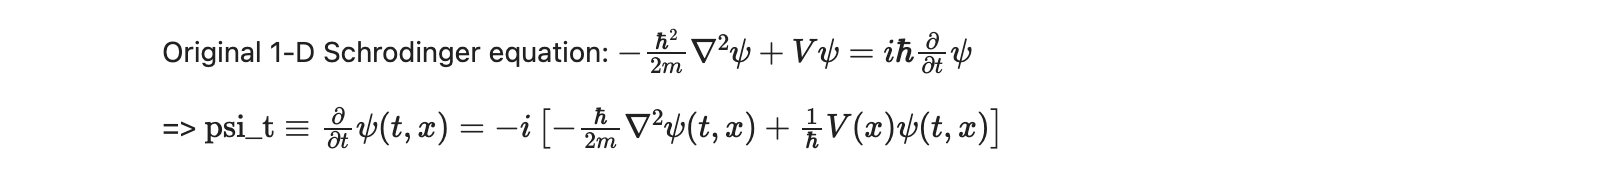

### RHS of Schrodinger Equation

In [117]:
using DifferentialEquations
hbar = 1
# hbar = 1.0545718176461565e-34
function psi_t!(psi,p,t)
    #println("hello")
    #display(psi)
    return -1*im * (- 0.5 * (hbar/2*m) * (D2 * psi) + ((Vol/hbar) * psi) )   
end

psi_t! (generic function with 1 method)

### Solving the Initial Value Problem

In [118]:
y0 = psi0;

function odeint(f,y0,t)
       prob = ODEProblem(psi_t!,y0,t_vals)
       t, sol = solve(prob,saveat=dt)
        return [sol.t,hcat(sol.u...)']
end

odeint (generic function with 1 method)

In [119]:
t, sol = odeint(psi_t!, y0, t_vals)

2-element Vector{AbstractArray}:
 [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0  …  91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0]
 ComplexF64[1.7744521288933604e-50 - 7.146220263211911e-50im -2.2540146600774105e-49 - 2.3876488655450957e-49im … -1.1866011053126653e-265 + 1.2569513557897803e-265im 1.2642219772405483e-267 + 5.091379228465608e-267im; 3.900433458579585e-6 + 1.4565560897277304e-5im -2.4377709116122412e-8 - 9.10347556079831e-8im … -1.9707612959238966e-215 + 3.4030500373487316e-216im -1.1740846929110902e-217 + 2.98107737597046e-218im; … ; 4.549563990881816e-5 + 3.3284041472636755e-5im 0.002666419631485866 + 0.013021677451072005im … -1.5667107293052113e-13 - 9.495143369312478e-13im -9.912080637705395e-16 - 5.958937219204025e-15im; 4.648212782839147e-5 - 3.306606749344723e-5im 0.0005444235277631106 - 0.010327706928807023im … 2.5359644634336017e-13 - 7.245294472462573e-13im 1.6589869011273088e-15 - 4.491392511120878e-15im]

## Plotting

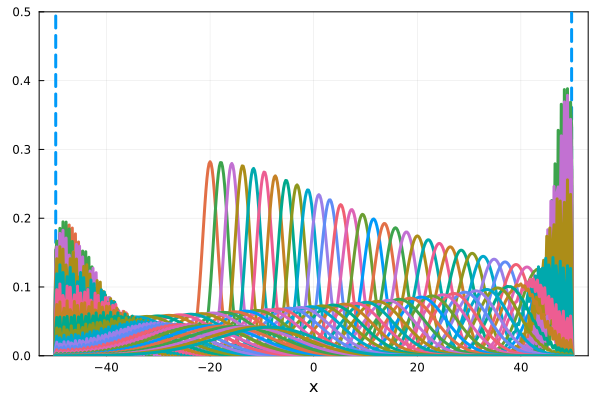

In [120]:
plot(x, potential_vals;lw = 3,ls=:dash,label = "Infinite Potential Well",xlabel = "x",legend=:topright, legendfontsize=10,framestyle = :box)
gr()
for i in 1:length(t)
        plot!(x, @.abs(sol[i,:])^2;lw = 3,legend = false)
        #println("Time = ",t[i],"  Total Probility = ",sum(@.abs(sol[i,:])^2)*dx)        # Print Total Probability (Should = 1)
end
ylims!(0,0.5)
current()




## Animation

[ Info: Saved animation to /Users/kedarmal/tutorial_anim.gif


Plots.AnimatedGif("/Users/kedarmal/tutorial_anim.gif")
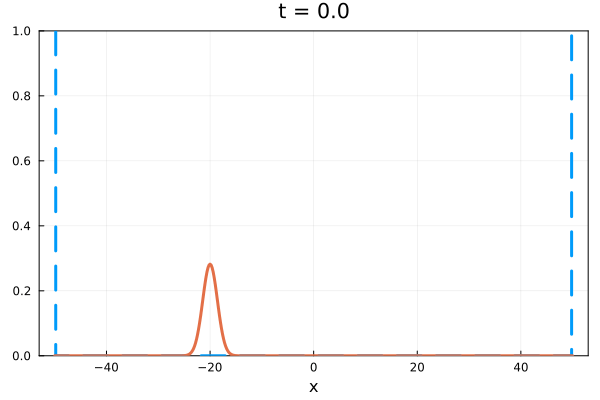

In [121]:
using Plots
anim = Animation() 
for i in 1:length(t)
        plot(x, potential_vals;lw = 3,ls=:dash,label = "Infinite Potential Well",xlabel = "x",legend=:topright, legendfontsize=10,framestyle = :box)
        plt=plot!(x, @.abs(sol[i,:])^2;lw = 3,legend = false,ylimit=(0,10))        
        title!("t = $(round(t[i], digits = 2))")
        ylims!(0,1)
        frame(anim, plt)

end
gif(anim, "tutorial_anim.gif", fps = 5)

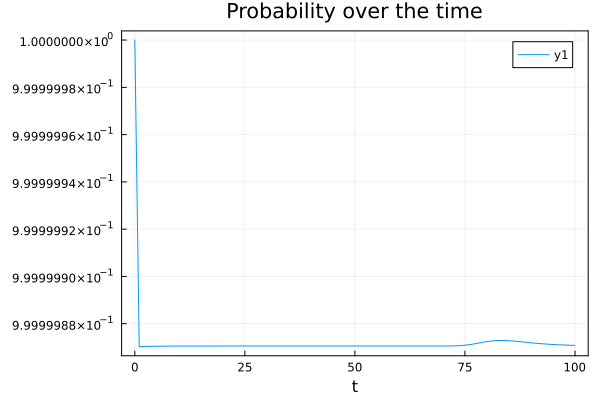

In [128]:
Prob = Array{Float64}(undef,length(t))
for i in 1:length(t)
    Prob[i] = sum(@.abs(sol[i,:])^2)*dx        # Print Total Probability (Should = 1)

end
plot(t,Prob,title="Probability over the time",xlabel="t",framestyle=:box)
